# Exercise 3

We generate a noisy dataset:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


## Plotting the data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

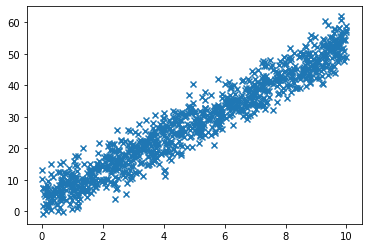

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Implementing Gradient Descent

We add an additional column for the bias to the dataset:

In [5]:
X_ = np.c_[X, np.ones((X.shape[0]))]

We initialize a weight matrix with random values:

In [6]:
num_samples = X_.shape[0]
num_features = X_.shape[1]

initial_weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)
weights = initial_weights.copy()

As in the previous exercise, we can implement gradient descent in the following way:

In [7]:
losses = []
for i in range(1, 301):
    prediction = X_ @ weights
    error = y - prediction
    L = np.square(error).sum()/num_samples
    # print("epoch {} loss: {}".format(i+1, L.item()))
    gradient = -2.0/num_samples * X_.T @ (y - prediction)
    weights -= 0.001 * gradient
    
    losses.append(L.item())

In [8]:
print(weights)
print("Final loss:", L)

[[5.23671974]
 [1.48692594]]
Final loss: 15.772267348443766


We can plot how the loss develops:

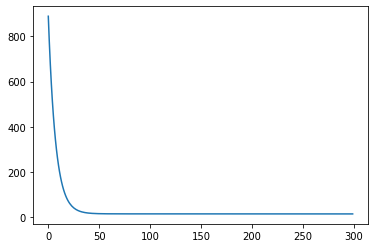

In [9]:
plt.plot(losses)
plt.show()

We can dump this loss curve to a file using the `pickle` module. This allows us to easily load it in another notebook lateron (See `exercise3_optimizers_comparision.ipynb`).

In [10]:
import pickle
with open("0_gd.pickle", "wb") as f:
    pickle.dump(losses, f)

But in practise, we seldom use vanilla gradient descent, as it operates on the whole dataset at once, and most datasets we encounter today are way too big to fit into memory at once. To avoid that, we can use mini-batch / stochastic gradient descent, which operates on individual batches of data, not the whole dataset at once.

The following is an implementation of mini-batch / stochastic gradient descent:

In [11]:
from math import ceil

BATCH_SIZE = 100
NUM_BATCHES = int(ceil(float(num_samples)/BATCH_SIZE))

def Loader():
    # This generates the batches, one after another
    # For a large dataset, we could load data from disk here
    for i in range(NUM_BATCHES):
        batch_X = X_[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_y = y[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        yield batch_X, batch_y

weights = initial_weights.copy()

losses = []
for epoch in range(1, 301):
    total_loss = 0
    for batch_X, batch_y in Loader():
        num_batch_samples = len(batch_y)
        prediction = batch_X @ weights
        error = batch_y - prediction
        L = np.square(error).sum()/num_batch_samples
        gradient = -2.0/num_batch_samples * batch_X.T @ (batch_y - prediction)
        
        weights -= 0.001 * gradient
        
        total_loss += L.item()*num_batch_samples
        
    epoch_loss = total_loss/num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    losses.append(epoch_loss)
    
print(weights)

epoch 1 loss: 519.2309266430411
epoch 100 loss: 15.354921722693158
epoch 200 loss: 15.087120884259553
epoch 300 loss: 14.988610352544555
[[5.03172189]
 [2.83620264]]


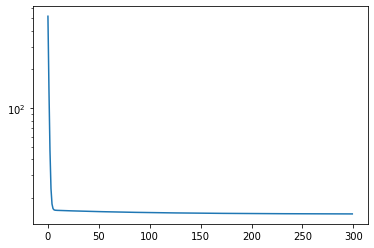

In [12]:
plt.plot(losses)
plt.yscale('log')
plt.show()

In [13]:
import pickle
with open("1_sgd.pickle", "wb") as f:
    pickle.dump(losses, f)